In [53]:
import pandas as pd
import shapely, json
import seaborn as sns

import pandas as pd
import datetime

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [54]:
df = pd.read_json('./highways-haiti.geojsonseq', lines = True)
df.head(1)

,geometry,properties,type
0,"{'coordinates': [[-72.32623245567083, 18.57718...","{'@c': 7165482, '@v': 1, '@uid': 288072, '@mV'...",Feature


In [55]:
props = pd.DataFrame( [x for x in df.properties.values] )
props['date'] = props['@vS'].apply(lambda t: pd.Timestamp(t*1000000000).date())

In [56]:
gb_date = props.groupby('date').aggregate({'@uid':'nunique','@id':'count','@v':'mean'})

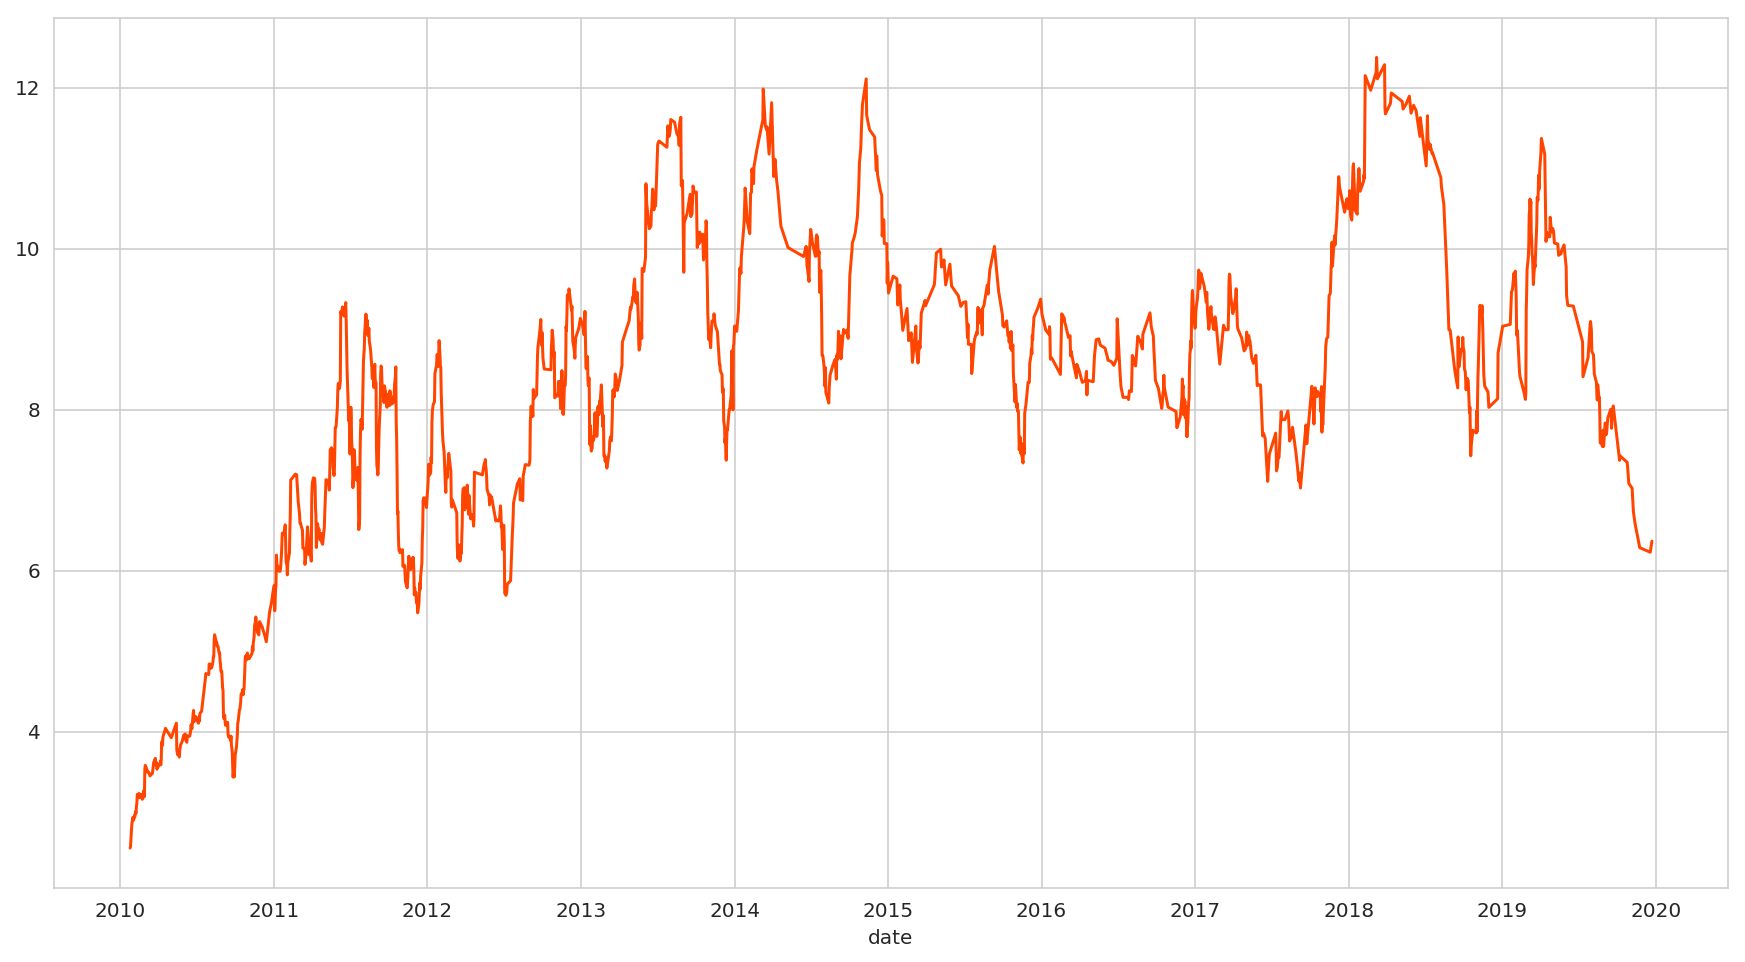

In [57]:
gb_date['@v'].rolling(30).mean().plot(color='orangered', figsize=(15,8))

Interesting to see the version of highways do this little arc over time... makes sense, just interesting :) 

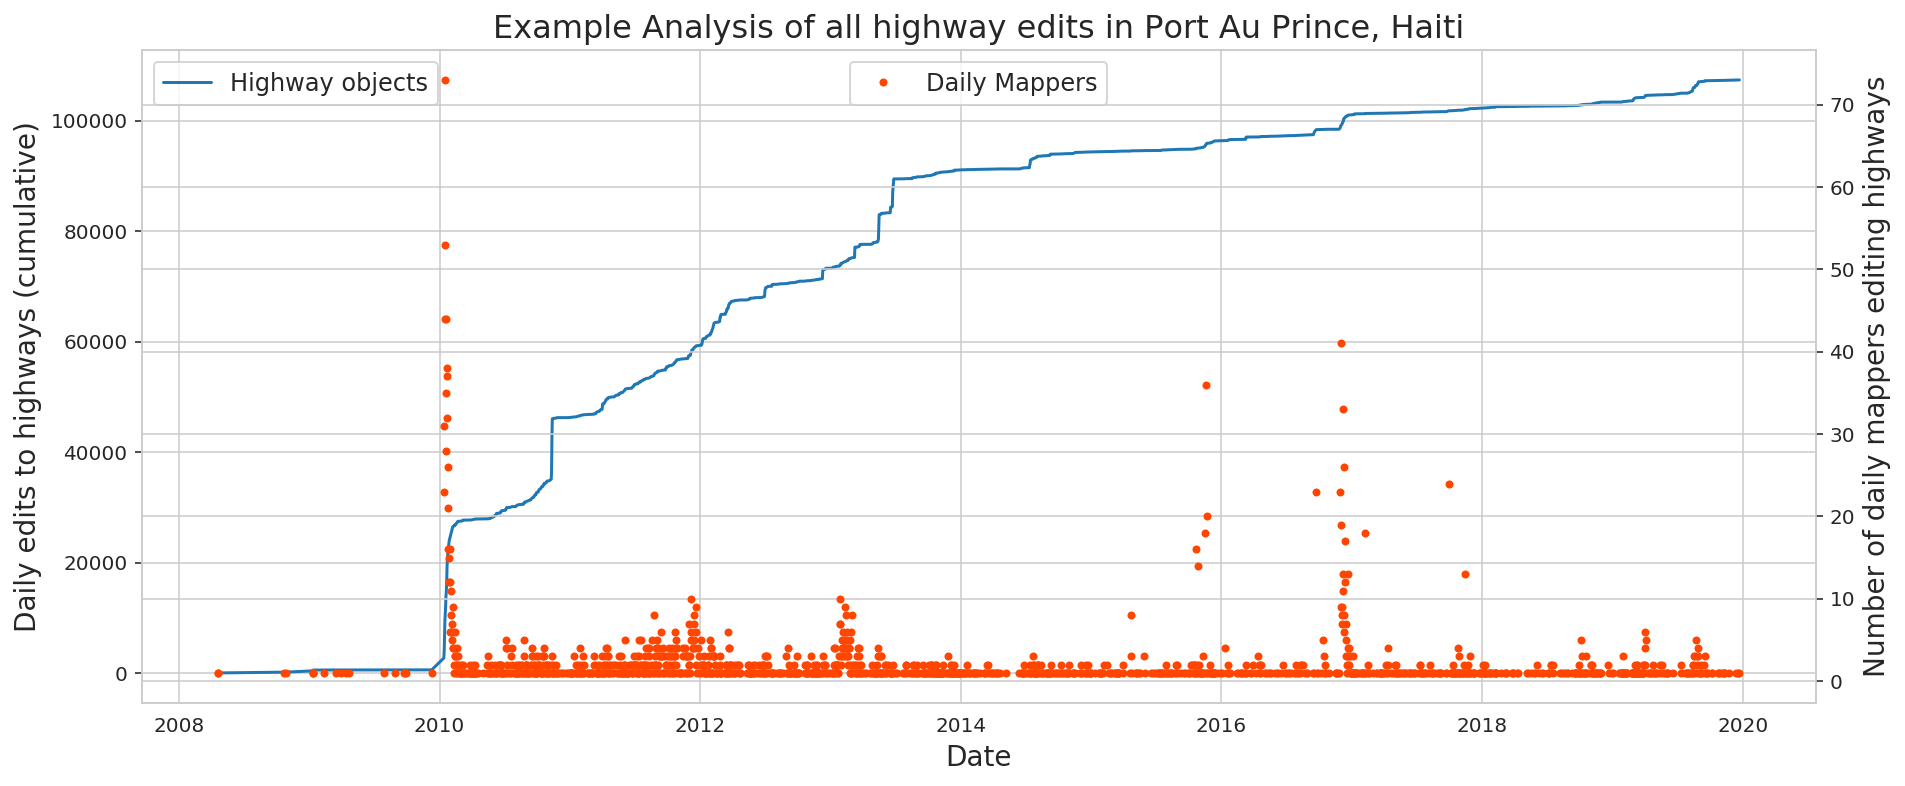

In [60]:
sns.set_style('whitegrid')
ax = gb_date['@id'].cumsum().plot(figsize=(15,6))
ax2 = gb_date['@uid'].plot(ax=ax.twinx(), color='orangered', style='.')

ax.set_xlabel("Date", fontsize=(14))
ax.set_ylabel("Daily edits to highways (cumulative)", fontsize=14)
ax2.set_ylabel("Number of daily mappers editing highways", fontsize=14);

ax.legend(["Highway objects"], loc='upper left', fontsize=12);
ax2.legend(["Daily Mappers"], loc='upper center', fontsize=12);

ax.set_title("Example Analysis of all highway edits in Port Au Prince, Haiti", fontsize=16);

In [61]:
df2 = pd.read_json('./buildings-haiti.geojsonseq', lines = True)
df2.head(1)

,geometry,properties,type
0,"{'coordinates': [[[-72.26775988005102, 18.5838...","{'source': 'bing', '@v': 1, '@uid': 1611, '@c'...",Feature


In [62]:
buildings_props = pd.DataFrame( [x for x in df2.properties.values] )
buildings_props['date'] = buildings_props['@vS'].apply(lambda t: pd.Timestamp(t*1000000000).date())

In [63]:
buildings_gb_date = buildings_props.groupby('date').aggregate({'@uid':'nunique','@id':'count'})

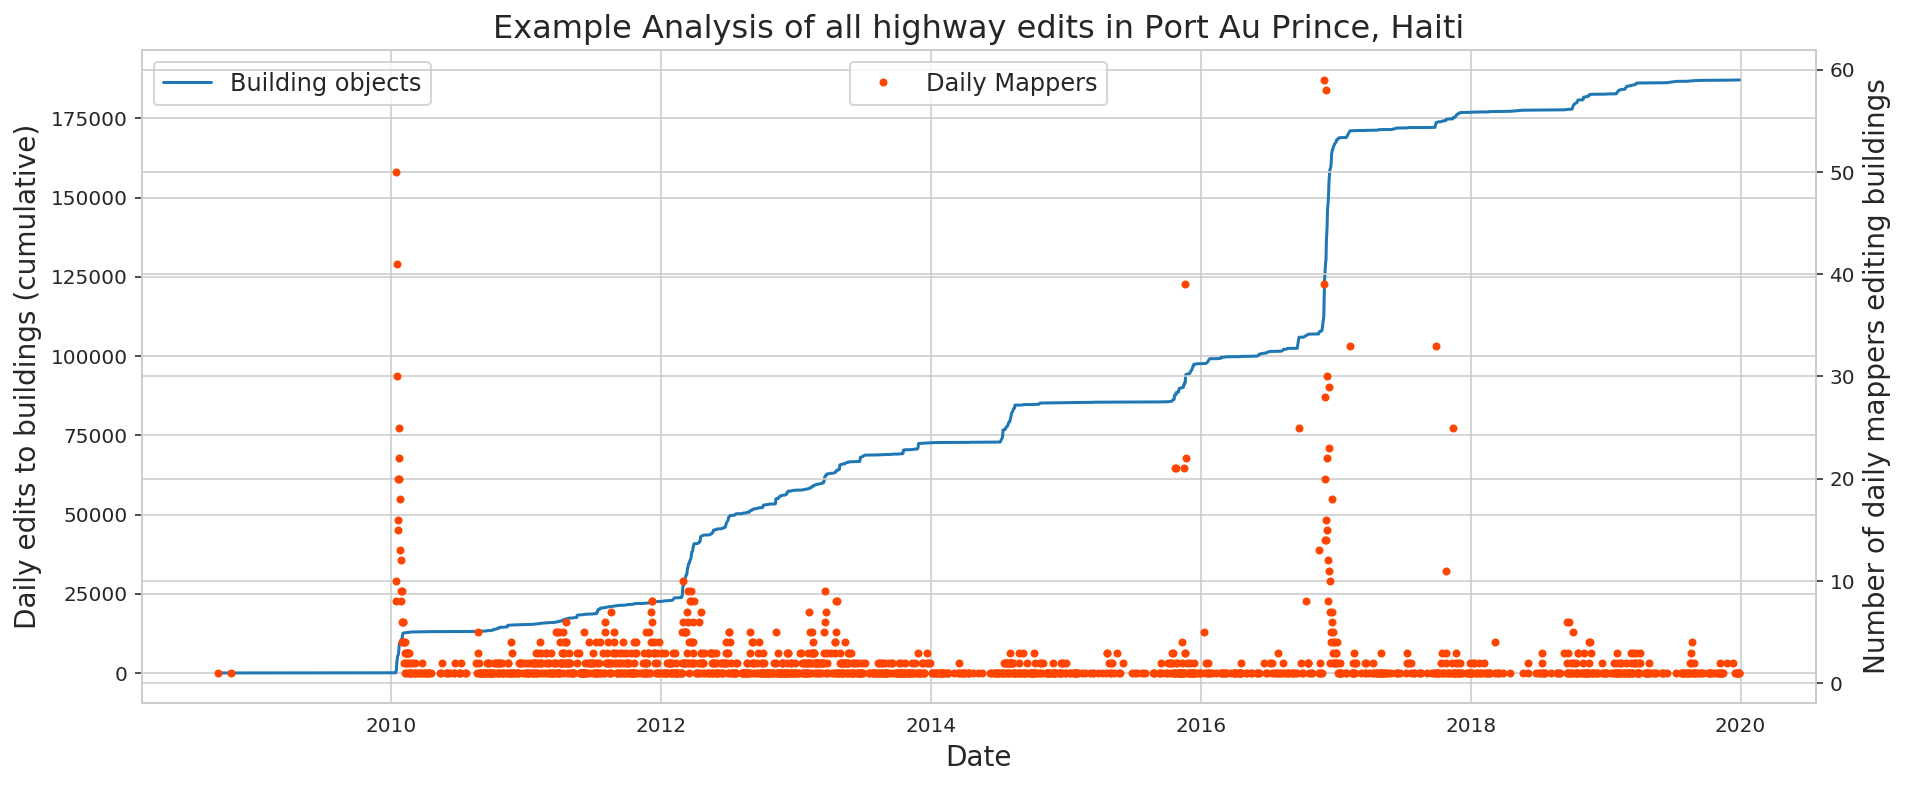

In [64]:
sns.set_style('whitegrid')
ax = buildings_gb_date['@id'].cumsum().plot(figsize=(15,6))
ax2 = buildings_gb_date['@uid'].plot(ax=ax.twinx(), color='orangered', style='.')

ax.set_xlabel("Date", fontsize=(14))
ax.set_ylabel("Daily edits to buildings (cumulative)", fontsize=14)
ax2.set_ylabel("Number of daily mappers editing buildings", fontsize=14);

ax.legend(["Building objects"], loc='upper left', fontsize=12);
ax2.legend(["Daily Mappers"], loc='upper center', fontsize=12);

ax.set_title("Example Analysis of all highway edits in Port Au Prince, Haiti", fontsize=16);